In [27]:
import pandas as pd

In [28]:
from textblob import TextBlob

In [29]:
import spacy

In [30]:
import yake

In [31]:
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

In [32]:
from nltk.corpus import stopwords

In [261]:
import numpy
import ast
import re

In [524]:
df = pd.read_csv('../../data/extracted_features_round4.csv', header=0)
del df['Unnamed: 0']
df['title_vectors_bert'] = df['title_vectors_bert'].apply(lambda x: ast.literal_eval(','.join(re.sub(r'(?<=\d)(\s+)(?=-?\d)', ',', x).splitlines())))
df['article_sentence_vectors_bert'] = df['article_sentence_vectors_bert'].apply(lambda x: ast.literal_eval(re.sub(r'((array\()|(dtype=float32\),)|(dtype=float32\)))', '', x)))

In [525]:
df['TL'] = df['title'].str.len()

In [526]:
df['AL'] = df['article'].str.len()

In [527]:
nlp = spacy.load('en_core_web_md')

In [528]:
df['title_tokens_spacy'] = df['title'].apply(lambda x: nlp(x))
df['article_tokens_spacy'] = df['article'].apply(lambda x: nlp(x))
df['title_lemmas_spacy'] = df.apply(lambda x: [token.lemma_ for token in x['title_tokens_spacy']], axis=1)
df['article_lemmas_spacy'] = df.apply(lambda x: [token.lemma_ for token in x['article_tokens_spacy']], axis=1)
df['title_tokens_no_stop_spacy'] = df['title'].apply(lambda x: nlp(' '.join([str(t) for t in nlp(x) if not t.is_stop])))
df['article_tokens_no_stop_spacy'] = df['article'].apply(lambda x: nlp(' '.join([str(t) for t in nlp(x) if not t.is_stop])))

In [529]:
def getWordCount(text):
    return len(TextBlob(text).words)

In [530]:
df['TWC'] = df['title'].apply(getWordCount)

In [531]:
df['AWC'] = df['article'].apply(getWordCount)

In [532]:
def getSentenceCount(text):
    return len(TextBlob(text).sentences)

In [533]:
df['TSC'] = df['title'].apply(getSentenceCount)

In [534]:
df['ASC'] = df['article'].apply(getSentenceCount)

In [535]:
df['TALRATIO'] = df['TL'] / df['AL']

In [536]:
df['TAWCRATIO'] = df['TWC'] / df['AWC']

In [537]:
df['TASCRATIO'] = df['TSC'] / df['ASC']

In [538]:
def getPolarity(text):
    text_no_stop = ''
    for token in text:
        text_no_stop = text_no_stop + token.text
    return TextBlob(text_no_stop).sentiment.polarity

In [539]:
def getSubjectivity(text):
    text_no_stop = ''
    for token in text:
        text_no_stop = text_no_stop + token.text
    return TextBlob(text_no_stop).sentiment.subjectivity

In [540]:
def getPartitionPolarity(text, partition_number, partition_index):
    start_index = len(text)//partition_number * (partition_index - 1)
    end_index = len(text)//partition_number * partition_index

    while start_index >= 0 and start_index < len(text) and text[start_index] != ' ':
        start_index = start_index + 1
    while end_index < len(text) and text[end_index] != ' ':
        end_index = end_index + 1
        
    return TextBlob(text[start_index:end_index]).sentiment.polarity

In [541]:
def getPartitionSubjectivity(text, partition_number, partition_index):
    start_index = len(text)//partition_number * (partition_index - 1)
    end_index = len(text)//partition_number * partition_index

    while start_index >= 0 and start_index < len(text) and text[start_index] != ' ':
        start_index = start_index + 1
    while end_index < len(text) and text[end_index] != ' ':
        end_index = end_index + 1
        
    return TextBlob(text[start_index:end_index]).sentiment.subjectivity

In [542]:
df['TP'] = df['title_tokens_no_stop_spacy'].apply(getPolarity)

In [543]:
df['AP'] = df['article_tokens_no_stop_spacy'].apply(getPolarity)

In [544]:
df['TAPD'] = df['AP'] - df['TP']

In [545]:
df['TAPMEAN'] = (df['AP'] + df['TP']) / 2

In [546]:
df['TS'] = df['title_tokens_no_stop_spacy'].apply(getPolarity)

In [547]:
df['AS'] = df['article_tokens_no_stop_spacy'].apply(getPolarity)

In [548]:
df['TASD'] = df['AS'] - df['TS']

In [549]:
df['TASMEAN'] = df['AS'] + df['TS']

In [550]:
df

,index,title,article,label,TL,AL,title_tokens_spacy,article_tokens_spacy,title_lemmas_spacy,article_lemmas_spacy,...,TABSSIMPBERT,TAWSSIMPBERT,TAGSSIMRATIOBERT,TAMIKWASSIMSPACY,TAMIKWBSSIMSPACY,TAMIKWWSSIMSPACY,TMIKWP,TAMKWSSIMSPACY,TAMKWSP,TAMKWSPD
0,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,4.5,68,1537,"(Nikki, Bella, Now, Believes, John, Cena, Want...","(John, Cena, 's, very, public, campaign, to, w...","[Nikki, Bella, now, believe, John, Cena, want,...","[John, Cena, 's, very, public, campaign, to, w...",...,0.062500,0.812500,0.250000,0.085057,0.751116,0.609801,0.0,0.638627,0.125918,0.125918
1,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,3.0,64,3753,"(Rouhani, says, Iran, will, keep, producing, m...","(DUBAI, (, Reuters, ), -, Iran, will, continue...","[Rouhani, say, Iran, will, keep, produce, miss...","[DUBAI, (, Reuters, ), -, Iran, will, continue...",...,0.052632,0.736842,0.789474,0.465548,0.868273,0.749374,0.0,0.767406,-0.016917,-0.016917
2,13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,4.5,47,686,"(Jerry, Jones, :, Ezekiel, Elliott, Wo, n't, B...","(Jerry, Jones, tells, TMZ, Sports, he, does, n...","[Jerry, Jones, :, Ezekiel, Elliott, will, not,...","[Jerry, Jones, tell, TMZ, Sports, he, do, not,...",...,0.142857,0.428571,0.285714,0.260440,0.743468,0.521139,0.0,0.547354,0.020408,0.020408
3,29908,Sen. Marco Rubio just threatened to “take care...,The decorum of the United States Senate was on...,3.5,73,2788,"(Sen., Marco, Rubio, just, threatened, to, “, ...","(The, decorum, of, the, United, States, Senate...","[Sen., Marco, Rubio, just, threaten, to, "", ta...","[the, decorum, of, the, United, States, Senate...",...,0.090909,0.954545,0.545455,0.000000,0.800000,0.700000,0.0,0.715668,0.054569,0.054569
4,31325,Darius McCrary Says Estranged Wife's Out for F...,"Former ""Family Matters"" star Darius McCrary to...",3.0,67,730,"(Darius, McCrary, Says, Estranged, Wife, 's, O...","(Former, "", Family, Matters, "", star, Darius, ...","[Darius, McCrary, say, estranged, Wife, 's, ou...","[former, "", Family, matter, "", star, Darius, M...",...,0.200000,0.800000,1.000000,0.253621,0.713680,0.554424,0.0,0.685036,-0.136667,-0.136667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2678751,Stimulus bill: When will you see money and ben...,(CNN)Congress and President Donald Trump have...,3.5,52,7393,"(Stimulus, bill, :, When, will, you, see, mone...","( , (, CNN)Congress, and, President, Donald, T...","[stimulus, bill, :, when, will, you, see, mone...","[ , (, cnn)congress, and, President, Donald, T...",...,0.062500,0.265625,0.406250,0.049837,0.874256,0.758666,0.0,0.704169,0.081640,0.081640
963,2679327,California coronavirus: Doctors 'cautiously ho...,(CNN)Two weeks after San Francisco issued the...,4.0,95,3193,"(California, coronavirus, :, Doctors, ', cauti...","( , (, CNN)Two, weeks, after, San, Francisco, ...","[California, coronavirus, :, doctor, ', cautio...","[ , (, cnn)two, week, after, San, Francisco, i...",...,0.040000,0.800000,0.480000,0.031917,0.797926,0.797926,0.0,0.732899,0.094829,0.094829
964,2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,4.0,32,8775,"($, 4.3, Million, Homes, in, California)","(What, you, Get, A, French, Caribbean, -, insp...","[$, 4.3, million, Homes, in, California]","[what, you, get, a, french, Caribbean, -, insp...",...,0.013889,0.833333,0.000000,0.000000,0.800000,0.700000,0.0,0.447729,0.094108,0.094108
965,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,2.5,82,9977,"(Ventilators, and, Coronavirus, :, Amid, Despe...","(President, Trump, wants, the, private, sector...","[ventilator, and, Coronavirus, :, amid, desper...","[President, Trump, want, the, private, sector,...",...,0.10

In [522]:
df.to_csv('../../data/extracted_features_round1.csv')
training_set = df.drop(columns=['index', 'title', 'article', 'title_tokens_spacy', 'article_tokens_spacy', 'title_lemmas_spacy', 'article_lemmas_spacy', 'title_tokens_no_stop_spacy', 'article_tokens_no_stop_spacy'])
training_set = training_set.rename(columns={'label':'CV'})
training_set.to_csv('../../data/extracted_features_round1_training.csv')

In [551]:
def count_special_character(string, divisor=1, from_start=True): 
    if from_start:
        string = string[:-(len(string)//divisor)]
    else:
        string = string[len(string)//divisor:]
    special_char= 0
   
    for i in range(0, len(string)):  
      
        ch = string[i]

        if (string[i].isalpha()):  
            continue

        elif (string[i].isdigit()):
            continue
            
        else: 
            special_char += 1
            
    return special_char

In [552]:
df['TSCCRATIO'] = df['title'].apply(count_special_character, args=(4, False)) / df['TL']

In [553]:
df['ASCCRATIO'] = df['article'].apply(count_special_character, args=(6,)) / df['AL']

In [554]:
df['TASCCRATIO'] = df['TSCCRATIO'] / df['ASCCRATIO']

In [555]:
df['TASCCD'] = df['ASCCRATIO'] - df['TSCCRATIO']

In [556]:
kw_extractor = yake.KeywordExtractor()
language = 'en'
max_ngram_size = 1
deduplication_threshold = 0.9
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, features=None)

In [557]:
df['title_keywords'] = df['title'].apply(lambda x: custom_kw_extractor.extract_keywords(x))

In [558]:
df['article_keywords'] = df['article'].apply(lambda x: custom_kw_extractor.extract_keywords(x))

In [559]:
df['TKWC'] = df['title_keywords'].apply(lambda x: len(x)) / df['TWC']

In [560]:
df['AKWC'] = df['article_keywords'].apply(lambda x: len(x)) / df['AWC']

In [561]:
df['TAKWCRATIO'] = df['TKWC'] / df['AKWC']

In [562]:
def get_most_important_keyword_polarity(keywords):
    if len(keywords) == 0:
        return 0
    
    max_importance = min(number for word, number in keywords)
    max_word = next((word for word, number in keywords if number == max_importance))
    return TextBlob(max_word).sentiment.polarity

In [563]:
df['TMIKWP'] = df['title_keywords'].apply(get_most_important_keyword_polarity)

In [564]:
df['AMIKWP'] = df['article_keywords'].apply(get_most_important_keyword_polarity)

In [565]:
def get_most_important_keyword_subjectivity(keywords):
    if len(keywords) == 0:
        return 0
    
    max_importance = min(number for word, number in keywords)
    max_word = next((word for word, number in keywords if number == max_importance))
    return TextBlob(max_word).sentiment.subjectivity

In [566]:
df['TMIKWS'] = df['title_keywords'].apply(get_most_important_keyword_subjectivity)

In [567]:
df['AMIKWS'] = df['article_keywords'].apply(get_most_important_keyword_subjectivity)

In [568]:
def get_first_sentence_polarity(text):
    return TextBlob(text).sentences[0].sentiment.polarity

In [569]:
df['AFSP'] = df['article'].apply(get_first_sentence_polarity)

In [570]:
df['TAFSPMEAN'] = (df['TP'] + df['AFSP']) / 2

In [571]:
df['TAFSPD'] = df['AFSP'] - df['TP']

In [572]:
def get_first_sentence_subjectivity(text):
    return TextBlob(text).sentences[0].sentiment.subjectivity

In [573]:
df['AFSS'] = df['article'].apply(get_first_sentence_subjectivity)

In [574]:
df['TAFSSMEAN'] = (df['TS'] + df['AFSS']) / 2

In [575]:
df['TAFSSD'] = df['AFSS'] - df['TP']

In [576]:
def get_most_important_keyword_occurrence(row):
    title_keywords = row['title_keywords']
    article_tokens = row['article_tokens_spacy']
    if len(title_keywords) == 0 or len(article_tokens) == 0:
        return 0
    
    title_max_importance = min(number for word, number in title_keywords)
    title_max_word = next((word for word, number in title_keywords if number == title_max_importance))
    title_max_lemma = nlp(title_max_word)[0].lemma_
    
    article_lemmas = row['article_lemmas_spacy']
    
    occurrences = 0

    for lemma in article_lemmas:
        if lemma.lower() == title_max_lemma.lower():
            occurrences = occurrences + 1
    return occurrences / len(article_lemmas)
    
    
    
    

In [577]:
df['TMIKWAORATIO'] = df.apply(get_most_important_keyword_occurrence, axis=1)

In [578]:
df['title_keyword_lemmas_spacy'] = df['title_keywords'].apply(lambda x: [(nlp(keyword)[0].lemma_, number) for keyword, number in x])

In [579]:
def get_title_keyword_occurrence(row):
    title_keywords = row['title_keywords']
    article_tokens = row['article_tokens_spacy']
    if len(title_keywords) == 0 or len(article_tokens) == 0:
        return 0

    title_lemmas = row['title_keyword_lemmas_spacy']
    
    article_lemmas = row['article_lemmas_spacy']
    
    occurrences = 0
    for title_lemma, title_number in title_lemmas:
        for article_lemma in article_lemmas:
            if article_lemma.lower() == title_lemma.lower():
                occurrences = occurrences + 1
    return occurrences / len(article_lemmas)
    

In [655]:
df['TKWAORATIO'] = df.apply(get_title_keyword_occurrence, axis=1)

In [656]:
data = df['TKWAORATIO'].to_numpy()
min_nonzero = numpy.min(data[numpy.nonzero(data)])
min_nonzero
df['TKWAORATIO'] = df['TKWAORATIO'].apply(lambda x: x if x > 0 else min_nonzero)
df['TKWAORATIO'] = df['TKWAORATIO'].apply(lambda x: numpy.where(x > 0.0000000001, numpy.log10(x), -10))

In [582]:
def get_title_keyword_occurrence_weighted(row):
    title_keywords = row['title_keywords']
    article_tokens = row['article_tokens_spacy']
    if len(title_keywords) == 0 or len(article_tokens) == 0:
        return 0

    title_lemmas = row['title_keyword_lemmas_spacy']
    
    article_lemmas = row['article_lemmas_spacy']
    
    occurrences = 0
    for title_lemma, title_number in title_lemmas:
        for article_lemma in article_lemmas:
            if article_lemma.lower() == title_lemma.lower():
                occurrences = occurrences + (1 * title_number)
    return occurrences / len(article_lemmas)

In [583]:
df['TKWAOWRATIO'] = df.apply(get_title_keyword_occurrence_weighted, axis=1)

In [584]:
data = df['TKWAOWRATIO'].to_numpy()
min_nonzero = numpy.min(data[numpy.nonzero(data)])
min_nonzero
df['TKWAOWRATIO'] = df['TKWAOWRATIO'].apply(lambda x: x if x > 0 else min_nonzero)
df['TKWAOWRATIO'] = df['TKWAOWRATIO'].apply(lambda x: numpy.where(x > 0.0000000001, numpy.log10(x), -10))

In [586]:
def get_mean_keyword_polarity(keywords):
    count = 0
    polarity = 0
    for word, number in keywords:
        polarity = polarity + TextBlob(word).sentiment.polarity
        count = count + 1
        
    if count != 0:
        return polarity / count
    
    return 0
        

In [587]:
df['TKWPMEAN'] = df['title_keywords'].apply(get_mean_keyword_polarity)

In [588]:
df['AKWPMEAN'] = df['article_keywords'].apply(get_mean_keyword_polarity)

In [589]:
df['TAKWPMEAN'] = (df['TKWPMEAN'] + df['AKWPMEAN']) / 2

In [590]:
df['TAKWPD'] = df['AKWPMEAN'] - df['TKWPMEAN']

In [591]:
def get_mean_keyword_polarity_weighted(keywords):
    count = 0
    polarity = 0
    for word, number in keywords:
        polarity = polarity + (TextBlob(word).sentiment.polarity * number)
        count = count + 1
        
    if count != 0:
        return polarity / count
    
    return 0

In [592]:
df['TKWPWMEAN'] = df['title_keywords'].apply(get_mean_keyword_polarity_weighted)
df['AKWPWMEAN'] = df['article_keywords'].apply(get_mean_keyword_polarity_weighted)
df['TAKWPWMEAN'] = (df['TKWPWMEAN'] + df['AKWPWMEAN']) / 2
df['TAKWPWD'] = df['AKWPWMEAN'] - df['TKWPWMEAN']

In [593]:
def get_most_important_keyword_first_position(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_lemmas = row['article_lemmas_spacy']
    if len(title_lemmas) == 0 or len(article_lemmas) == 0:
        return 1
    
    title_max_importance = min(number for word, number in title_lemmas)
    title_max_lemma = next((word for word, number in title_lemmas if number == title_max_importance))
    
    position = 0
    for lemma in article_lemmas:
        position = position + 1
        if lemma.lower() == title_max_lemma.lower():
            break
            
    return position / len(article_lemmas)

In [594]:
df['TAMIKWFP'] = df.apply(get_most_important_keyword_first_position, axis=1)

In [595]:
def get_most_important_keyword_distribution(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_lemmas = row['article_lemmas_spacy']
    if len(title_lemmas) == 0 or len(article_lemmas) == 0:
        return 0
    
    title_max_importance = min(number for word, number in title_lemmas)
    title_max_lemma = next((word for word, number in title_lemmas if number == title_max_importance))
    
    position = 0
    occurrences = []
    for lemma in article_lemmas:
        if lemma.lower() == title_max_lemma.lower():
            occurrences.append(position)
        position = position + 1
    
    if len(occurrences) == 0:
        return 0
    
    distribution = 0
    for position in occurrences:
        distribution = distribution + (position - (len(article_lemmas) - 1) / 2)
    
    distribution = distribution / len(occurrences)
            
    return distribution / ((len(article_lemmas) - 1) / 2)

In [596]:
df['TAMIKWDIST'] = df.apply(get_most_important_keyword_distribution, axis=1)

In [597]:
def get_keyword_distribution(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_lemmas = row['article_lemmas_spacy']
    if len(title_lemmas) == 0 or len(article_lemmas) == 0:
        return 0
    
    occurrences = []
    for title_lemma, title_number in title_lemmas:
        position = 0
        for article_lemma in article_lemmas:
            if article_lemma.lower() == title_lemma.lower():
                occurrences.append(position)
            position = position + 1
    
    if len(occurrences) == 0:
        return 0
    
    distribution = 0
    for position in occurrences:
        distribution = distribution + (position - (len(article_lemmas) - 1) / 2)
    
    distribution = distribution / len(occurrences)
            
    return distribution / ((len(article_lemmas) - 1) / 2)

In [598]:
df['TAKWDIST'] = df.apply(get_keyword_distribution, axis=1)

In [106]:
df.to_csv('../../data/extracted_features_round2.csv')
training_set = df.drop(columns=['index', 'title', 'article', 'title_keywords', 'article_keywords', 'title_tokens_spacy', 'article_tokens_spacy', 'title_lemmas_spacy', 'article_lemmas_spacy', 'title_keywords', 'article_keywords', 'title_keyword_lemmas_spacy', 'title_tokens_no_stop_spacy', 'article_tokens_no_stop_spacy'])
training_set = training_set.rename(columns={'label':'CV'})
training_set.to_csv('../../data/extracted_features_round2_training.csv')

In [599]:
def get_similarity_score(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_doc = row ['article_tokens_no_stop_spacy']
    
    return title_doc.similarity(article_doc)

In [600]:
df['TASIMSPACY'] = df.apply(get_similarity_score, axis=1)

In [601]:
df['article_sentences'] = df['article'].apply(lambda x: TextBlob(x).sentences)

In [602]:
df['article_sentence_tokens_spacy'] = df['article_sentences'].apply(lambda x: [nlp(str(sentence)) for sentence in x])

In [603]:
df['article_sentence_tokens_no_stop_spacy'] = df['article_sentence_tokens_spacy'].apply(lambda x: [nlp(' '.join([str(t) for t in sentence if not t.is_stop])) for sentence in x])

In [604]:
def get_best_sentence_similarity_score(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
        
    scores = []
    for doc in article_docs:
        scores.append(title_doc.similarity(doc))
    
    return max(scores)

In [605]:
df['TABSSIMSPACY'] = df.apply(get_best_sentence_similarity_score, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/4069332995.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores.append(title_doc.similarity(doc))


In [606]:
def get_worst_sentence_similarity_score(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
        
    scores = []
    for doc in article_docs:
        scores.append(title_doc.similarity(doc))
    
    return min(scores)

In [607]:
df['TAWSSIMSPACY'] = df.apply(get_worst_sentence_similarity_score, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/2013556861.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores.append(title_doc.similarity(doc))


In [608]:
def get_average_sentence_similarity_score(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
        
    score = 0
    for doc in article_docs:
        score = score + (title_doc.similarity(doc))
    
    return score / len(article_docs)

In [609]:
df['TAASSIMSPACY'] = df.apply(get_average_sentence_similarity_score, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/2634829990.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  score = score + (title_doc.similarity(doc))


In [610]:
def get_first_sentence_similarity_score(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_doc = row['article_sentence_tokens_no_stop_spacy'][0]
    
    return title_doc.similarity(article_doc)

In [611]:
df['TAFSSIMSPACY'] = df.apply(get_first_sentence_similarity_score, axis=1)

In [612]:
def get_best_sentence_similarity_position(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
        
    scores = []
    for doc in article_docs:
        scores.append(title_doc.similarity(doc))
    
    max_score = max(scores)
    
    return (scores.index(max_score) + 1) / len(article_docs)

In [613]:
df['TABSSIMPSPACY'] = df.apply(get_best_sentence_similarity_position, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/2584009954.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores.append(title_doc.similarity(doc))


In [614]:
def get_worst_sentence_similarity_position(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
        
    scores = []
    for doc in article_docs:
        scores.append(title_doc.similarity(doc))
    
    min_score = min(scores)
    
    return (scores.index(min_score) + 1) / len(article_docs)

In [615]:
df['TAWSSIMPSPACY'] = df.apply(get_worst_sentence_similarity_position, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/3901347589.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores.append(title_doc.similarity(doc))


In [616]:
def get_good_sentence_similarity_ratio(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
        
    scores = []
    for doc in article_docs:
        scores.append(title_doc.similarity(doc))
        
    condition = lambda x: x>=0.90
    
    return sum(condition(x) for x in scores) / len(article_docs)

In [617]:
df['TAGSSIMRATIOSPACY'] = df.apply(get_good_sentence_similarity_ratio, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/3374778989.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores.append(title_doc.similarity(doc))


In [618]:
def count_word_types(doc, word_type):
    count = 0
    
    for token in doc:
        if token.pos_ == word_type:
            count = count + 1
    
    return count / len(doc)

In [619]:
df['TVC'] = df['title_tokens_spacy'].apply(count_word_types, args=('VERB',))

In [620]:
df['AVC'] = df['article_tokens_spacy'].apply(count_word_types, args=('VERB',))

In [621]:
df['TAVCD'] = df['AVC'] - df['TVC']

In [622]:
df['TNC'] = df['title_tokens_spacy'].apply(count_word_types, args=('NOUN',))

In [623]:
df['ANC'] = df['article_tokens_spacy'].apply(count_word_types, args=('NOUN',))

In [624]:
df['TANCD'] = df['ANC'] - df['TNC']

In [108]:
df.to_csv('../../data/extracted_features_round3.csv')
training_set = df.drop(columns=['index', 'title', 'article', 'title_keywords', 'article_keywords', 'title_tokens_spacy', 'article_tokens_spacy', 'title_lemmas_spacy', 'article_lemmas_spacy', 'title_keywords', 'article_keywords', 'title_keyword_lemmas_spacy', 'article_sentences', 'article_sentence_tokens_spacy', 'title_tokens_no_stop_spacy', 'article_tokens_no_stop_spacy', 'article_sentence_tokens_no_stop_spacy'])
training_set = training_set.rename(columns={'label':'CV'})
training_set.to_csv('../../data/extracted_features_round3_training.csv')

In [142]:
import torch#pytorch
from transformers import AutoTokenizer, AutoModel#for embeddings
from sklearn.metrics.pairwise import cosine_similarity#for similarity

In [157]:
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased",)
bert_model = AutoModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [158]:
def get_embeddings_bert(text, token_length):
    tokens=bert_tokenizer(text,max_length=token_length,padding='max_length',truncation=True)
    output=bert_model(torch.tensor(tokens.input_ids).unsqueeze(0),
               attention_mask=torch.tensor(tokens.attention_mask).unsqueeze(0)).hidden_states[-1]
    return torch.mean(output,axis=1).detach().numpy()

In [159]:
df['title_vectors_bert'] = df['title'].apply(get_embeddings_bert, args=(256,))

In [163]:
df['article_sentence_vectors_bert'] = df['article_sentences'].apply(lambda x: [get_embeddings_bert(str(sentence), 256) for sentence in x])

In [190]:
def get_best_sentence_similarity_score_bert(row):
    title_vector = row['title_vectors_bert']
    article_vectors = row['article_sentence_vectors_bert']
        
    scores = []
    for vector in article_vectors:
        scores.append(cosine_similarity(title_vector, vector)[0][0])
    
    return max(scores)

In [191]:
df['TABSSIMBERT'] = df.apply(get_best_sentence_similarity_score_bert, axis=1)

In [192]:
def get_worst_sentence_similarity_score_bert(row):
    title_vector = row['title_vectors_bert']
    article_vectors = row['article_sentence_vectors_bert']
        
    scores = []
    for vector in article_vectors:
        scores.append(cosine_similarity(title_vector, vector)[0][0])
    
    return min(scores)

In [193]:
df['TAWSSIMBERT'] = df.apply(get_worst_sentence_similarity_score_bert, axis=1)

In [194]:
def get_average_sentence_similarity_score_bert(row):
    title_vector = row['title_vectors_bert']
    article_vectors = row['article_sentence_vectors_bert']
        
    score = 0
    for vector in article_vectors:
        score = score + cosine_similarity(title_vector, vector)[0][0]
    
    return score / len(article_vectors)

In [195]:
df['TAASSIMSBERT'] = df.apply(get_average_sentence_similarity_score_bert, axis=1)

In [196]:
def get_first_sentence_similarity_score_bert(row):
    title_vector = row['title_vectors_bert']
    article_vector = row['article_sentence_vectors_bert'][0]
    
    return cosine_similarity(title_vector, article_vector)[0][0]

In [197]:
df['TAFSSIMBERT'] = df.apply(get_first_sentence_similarity_score_bert, axis=1)

In [198]:
def get_best_sentence_similarity_position_bert(row):
    title_vector = row['title_vectors_bert']
    article_vectors = row['article_sentence_vectors_bert']
        
    scores = []
    for vector in article_vectors:
        scores.append(cosine_similarity(title_vector, vector)[0][0])
    
    max_score = max(scores)
    
    return (scores.index(max_score) + 1) / len(article_vectors)

In [199]:
df['TABSSIMPBERT'] = df.apply(get_best_sentence_similarity_position_bert, axis=1)

In [433]:
def get_worst_sentence_similarity_position_bert(row):
    title_vector = row['title_vectors_bert']
    article_vectors = row['article_sentence_vectors_bert']
    scores = []
    for vector in article_vectors:
        scores.append(cosine_similarity(title_vector, vector)[0][0])
    
    min_score = min(scores)
    
    return (scores.index(min_score) + 1) / len(article_vectors)

In [437]:
df['TAWSSIMPBERT'] = df.apply(get_worst_sentence_similarity_position_bert, axis=1)

In [396]:
def get_good_sentence_similarity_ratio_bert(row):
    title_keywords = row['title_keywords']
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
        
    scores = []
    for doc in article_docs:
        scores.append(title_doc.similarity(doc))
    
    max_score = max(scores)
    
    return (scores.index(max_score) + 1) / len(article_docs)

In [206]:
df['TAGSSIMRATIOBERT'] = df.apply(get_good_sentence_similarity_ratio_bert, axis=1)

In [625]:
def get_most_important_keyword_average_sentence_similarity_spacy(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    
    if len(title_lemmas) == 0 or len(article_docs) == 0:
        return 1
    title_max_importance = min(number for word, number in title_lemmas)
    title_max_lemma = next((word for word, number in title_lemmas if number == title_max_importance))
    
    matching_article_docs = []
    for doc in article_docs:
        if title_max_lemma in [token.lemma_ for token in doc]:
            matching_article_docs.append(doc)
    
    score = 0
    for doc in matching_article_docs:
        score = score + (title_doc.similarity(doc))
    
    return score / len(article_docs)

In [626]:
df['TAMIKWASSIMSPACY'] = df.apply(get_most_important_keyword_average_sentence_similarity_spacy, axis=1)

In [627]:
def get_most_important_keyword_best_sentence_similarity_spacy(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    
    if len(title_lemmas) == 0 or len(article_docs) == 0:
        return 1
    title_max_importance = min(number for word, number in title_lemmas)
    title_max_lemma = next((word for word, number in title_lemmas if number == title_max_importance))
    
    matching_article_docs = []
    for doc in article_docs:
        if title_max_lemma in [token.lemma_ for token in doc]:
            matching_article_docs.append(doc)
    
    scores = []
    for doc in matching_article_docs:
        scores.append(title_doc.similarity(doc))
    
    return max(scores) if len(scores) != 0 else 0.8

In [628]:
df['TAMIKWBSSIMSPACY'] = df.apply(get_most_important_keyword_best_sentence_similarity_spacy, axis=1)

In [629]:
def get_most_important_keyword_worst_sentence_similarity_spacy(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    
    if len(title_lemmas) == 0 or len(article_docs) == 0:
        return 1
    title_max_importance = min(number for word, number in title_lemmas)
    title_max_lemma = next((word for word, number in title_lemmas if number == title_max_importance))
    
    matching_article_docs = []
    for doc in article_docs:
        if title_max_lemma in [token.lemma_ for token in doc]:
            matching_article_docs.append(doc)
    
    scores = []
    for doc in matching_article_docs:
        scores.append(title_doc.similarity(doc))
    
    return min(scores) if len(scores) != 0 else 0.7

In [630]:
df['TAMIKWWSSIMSPACY'] = df.apply(get_most_important_keyword_worst_sentence_similarity_spacy, axis=1)

In [631]:
def get_most_keywords_similarity(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    
    max_count = 0
    sentences = []
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > max_count:
            sentences = [doc]
        elif count == max_count:
            sentences.append(doc)
            
    sim_score = 0
    for sentence in sentences:
        sim_score = sim_score + title_doc.similarity(sentence)
    
    return sim_score / len(sentences) if len(sentences) != 0 else 0

In [632]:
df['TAMKWSSIMSPACY'] = df.apply(get_most_keywords_similarity, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/1740321506.py:20: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sim_score = sim_score + title_doc.similarity(sentence)


In [633]:
def get_most_keywords_sentence_polarity(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    article_sentences = row['article_sentences']
    
    max_count = 0
    sentences = []
    sentence_index = 0
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > max_count:
            sentences = [sentence_index]
        elif count == max_count:
            sentences.append(sentence_index)
        sentence_index = sentence_index + 1
            
    pol_score = 0
    for sentence in sentences:
        pol_score = pol_score + TextBlob(str(article_sentences[sentence])).sentiment.polarity
    
    return pol_score / len(sentences) if len(sentences) != 0 else 0

In [634]:
df['TAMKWSP'] = df.apply(get_most_keywords_sentence_polarity, axis=1)

In [635]:
df['TAMKWSPD'] = df['TAMKWSP'] - df['TP']

In [636]:
def get_most_keywords_sentence_subjectivity(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    article_sentences = row['article_sentences']
    
    max_count = 0
    sentences = []
    sentence_index = 0
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > max_count:
            sentences = [sentence_index]
        elif count == max_count:
            sentences.append(sentence_index)
        sentence_index = sentence_index + 1
            
    pol_score = 0
    for sentence in sentences:
        pol_score = pol_score + TextBlob(str(article_sentences[sentence])).sentiment.subjectivity
    
    return pol_score / len(sentences) if len(sentences) != 0 else 0

In [637]:
df['TAMKWSS'] = df.apply(get_most_keywords_sentence_subjectivity, axis=1)

In [638]:
df['TAMKWSSD'] = df['TAMKWSS'] - df['TP']

In [639]:
def get_most_keywords_sentence_position(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    article_sentences = row['article_sentences']
    
    max_count = 0
    best_sentence_index = 0
    sentence_index = 1
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > max_count:
            best_sentence_index = sentence_index
        sentence_index = sentence_index + 1
            
    return best_sentence_index / len(article_sentences)

In [640]:
df['TAMKWFP'] = df.apply(get_most_keywords_sentence_position, axis=1)

In [641]:
def get_keyword_sentences_similarity(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    
    sentences = []
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > 0:
            sentences.append(doc)
           
            
    sim_score = 0
    for sentence in sentences:
        sim_score = sim_score + title_doc.similarity(sentence)
    
    return sim_score / len(sentences) if len(sentences) != 0 else 0

In [642]:
df['TAKWSIMSPACY'] = df.apply(get_keyword_sentences_similarity, axis=1)

In [643]:
def get_keyword_sentences_polarity(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    article_sentences = row['article_sentences']
    
    max_count = 0
    sentences = []
    sentence_index = 0
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > 1:
            sentences.append(sentence_index)
            
    pol_score = 0
    for sentence in sentences:
        pol_score = pol_score + TextBlob(str(article_sentences[sentence])).sentiment.polarity
    
    return pol_score / len(sentences) if len(sentences) != 0 else 0

In [644]:
df['TAKWSP'] = df.apply(get_keyword_sentences_polarity, axis=1)

In [645]:
df['TAKWSPD'] = df['TAKWSP'] - df['TP']

In [646]:
def get_keyword_sentences_subjectivity(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    article_sentences = row['article_sentences']
    
    max_count = 0
    sentences = []
    sentence_index = 0
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > 1:
            sentences.append(sentence_index)
            
    pol_score = 0
    for sentence in sentences:
        pol_score = pol_score + TextBlob(str(article_sentences[sentence])).sentiment.subjectivity
    
    return pol_score / len(sentences) if len(sentences) else 0

In [647]:
df['TAKWSS'] = df.apply(get_keyword_sentences_polarity, axis=1)

In [648]:
df['TAKWSSD'] = df['TAKWSS'] - df['TS']

In [649]:
def get_keyword_sentences_similarity_variance(row):
    title_lemmas = row['title_keyword_lemmas_spacy']
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    
    sentences = []
    for doc in article_docs:
        count = 0
        for title_lemma in title_lemmas:
            if title_lemma in [token.lemma_ for token in doc]:
                count = count + 1
        if count > 0:
            sentences.append(doc)
           
            
    sim_scores = []
    for sentence in sentences:
        sim_score = sim_scores.append(title_doc.similarity(sentence))
    
    return numpy.var(sim_scores) / row['AL'] if len(sim_scores) != 0 else 0

In [650]:
df['TAKWSIMVARSPACY'] = df.apply(get_keyword_sentences_similarity_variance, axis=1)

In [664]:
def get_good_sentence_similarity_distribution(row):
    title_doc = row['title_tokens_no_stop_spacy']
    article_docs = row['article_sentence_tokens_no_stop_spacy']
    best_sim = row['TABSSIMSPACY']
        
    scores = []
    for doc in article_docs:
        scores.append(title_doc.similarity(doc))
        
    condition = lambda x: x>=0.90
    
    index = 0
    indexes = []
    for score in scores:
        if score >= (best_sim * 0.8):
            indexes.append(index)
        index = index + 1
    
    
    distribution = 0
    for i in indexes:
        distribution = distribution + (i - (len(article_docs) - 1) / 2)
            
    return distribution / ((len(article_docs) - 1) / 2) if ((len(article_docs) - 1) / 2) != 0 else distribution

In [665]:
df['TAGSSIMDISTSPACY'] = df.apply(get_good_sentence_similarity_distribution, axis=1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_32408/1416477517.py:8: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores.append(title_doc.similarity(doc))


In [666]:
df

,index,title,article,label,TL,AL,title_tokens_spacy,article_tokens_spacy,title_lemmas_spacy,article_lemmas_spacy,...,TAMKWSS,TAMKWSSD,TAMKWFP,TAKWSIMSPACY,TAKWSP,TAKWSPD,TAKWSS,TAKWSSD,TAKWSIMVARSPACY,TAGSSIMDISTSPACY
0,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,4.5,68,1537,"(Nikki, Bella, Now, Believes, John, Cena, Want...","(John, Cena, 's, very, public, campaign, to, w...","[Nikki, Bella, now, believe, John, Cena, want,...","[John, Cena, 's, very, public, campaign, to, w...",...,0.258348,0.258348,0.0,0,0,0.0,0,0.0,0,-1.533333
1,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,3.0,64,3753,"(Rouhani, says, Iran, will, keep, producing, m...","(DUBAI, (, Reuters, ), -, Iran, will, continue...","[Rouhani, say, Iran, will, keep, produce, miss...","[DUBAI, (, Reuters, ), -, Iran, will, continue...",...,0.164232,0.164232,0.0,0,0,0.0,0,0.0,0,-0.444444
2,13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,4.5,47,686,"(Jerry, Jones, :, Ezekiel, Elliott, Wo, n't, B...","(Jerry, Jones, tells, TMZ, Sports, he, does, n...","[Jerry, Jones, :, Ezekiel, Elliott, will, not,...","[Jerry, Jones, tell, TMZ, Sports, he, do, not,...",...,0.232993,0.232993,0.0,0,0,0.0,0,0.0,0,-1.000000
3,29908,Sen. Marco Rubio just threatened to “take care...,The decorum of the United States Senate was on...,3.5,73,2788,"(Sen., Marco, Rubio, just, threatened, to, “, ...","(The, decorum, of, the, United, States, Senate...","[Sen., Marco, Rubio, just, threaten, to, "", ta...","[the, decorum, of, the, United, States, Senate...",...,0.237121,0.237121,0.0,0,0,0.0,0,0.0,0,-4.047619
4,31325,Darius McCrary Says Estranged Wife's Out for F...,"Former ""Family Matters"" star Darius McCrary to...",3.0,67,730,"(Darius, McCrary, Says, Estranged, Wife, 's, O...","(Former, "", Family, Matters, "", star, Darius, ...","[Darius, McCrary, say, estranged, Wife, 's, ou...","[former, "", Family, matter, "", star, Darius, M...",...,0.280833,0.280833,0.0,0,0,0.0,0,0.0,0,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2678751,Stimulus bill: When will you see money and ben...,(CNN)Congress and President Donald Trump have...,3.5,52,7393,"(Stimulus, bill, :, When, will, you, see, mone...","( , (, CNN)Congress, and, President, Donald, T...","[stimulus, bill, :, when, will, you, see, mone...","[ , (, cnn)congress, and, President, Donald, T...",...,0.343266,0.343266,0.0,0,0,0.0,0,0.0,0,-2.333333
963,2679327,California coronavirus: Doctors 'cautiously ho...,(CNN)Two weeks after San Francisco issued the...,4.0,95,3193,"(California, coronavirus, :, Doctors, ', cauti...","( , (, CNN)Two, weeks, after, San, Francisco, ...","[California, coronavirus, :, doctor, ', cautio...","[ , (, cnn)two, week, after, San, Francisco, i...",...,0.320870,0.320870,0.0,0,0,0.0,0,0.0,0,-2.333333
964,2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,4.0,32,8775,"($, 4.3, Million, Homes, in, California)","(What, you, Get, A, French, Caribbean, -, insp...","[$, 4.3, million, Homes, in, California]","[what, you, get, a, french, Caribbean, -, insp...",...,0.293500,0.293500,0.0,0,0,0.0,0,0.0,0,0.943662
965,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,2.5,82,9977,"(Ventilators, and, Coronavirus, :, Amid, Despe...","(President, Trump, wants, the, private, sector...","[ventilator, and, Coronavirus, :, amid, desper...","[President, Trump, want, the, private, sector,...",...,0.347061,0.347061,0.0,0,0,0.0,0,0.0,0,-5.347826


In [ ]:
most occurring keyword sentence similarity

<AxesSubplot:>

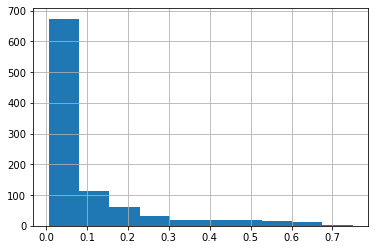

In [ ]:
article sentence aufteilung

In [ ]:
andere keywords

In [ ]:
keyword dinger in least important keyword umbenennen

In [ ]:
datensatz cleanen

In [667]:
df.to_csv('../../data/extracted_features_round4.csv')

In [668]:

training_set = df.drop(columns=['index', 'title', 'article', 'title_keywords', 'article_keywords', 'title_tokens_spacy', 'article_tokens_spacy', 'title_lemmas_spacy', 'article_lemmas_spacy', 'title_keywords', 'article_keywords', 'title_keyword_lemmas_spacy', 'article_sentences', 'article_sentence_tokens_spacy', 'title_tokens_no_stop_spacy', 'article_tokens_no_stop_spacy', 'article_sentence_tokens_no_stop_spacy', 'title_vectors_bert', 'article_sentence_vectors_bert'])
training_set = training_set.rename(columns={'label':'CV'})
training_set.to_csv('../../data/extracted_features_round4_training.csv')

In [294]:
df

,index,title,article,label,TL,AL,title_tokens_spacy,article_tokens_spacy,title_lemmas_spacy,article_lemmas_spacy,...,TAWSSIMBERT,TAASSIMSBERT,TAFSSIMBERT,TABSSIMPBERT,TAWSSIMPBERT,TAGSSIMRATIOBERT,TAMIKWASSIMSPACY,TAMIKWBSSIMSPACY,TAMIKWWSSIMSPACY,title_keyword_count
0,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,4.5,68,1537,"(Nikki, Bella, Now, Believes, John, Cena, Want...","(John, Cena, 's, very, public, campaign, to, w...","[Nikki, Bella, now, believe, John, Cena, want,...","[John, Cena, 's, very, public, campaign, to, w...",...,0.646927,0.751304,0.855155,0.062500,0.812500,0.250000,0.085057,0.751116,0.609801,6
1,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,3.0,64,3753,"(Rouhani, says, Iran, will, keep, producing, m...","(DUBAI, (, Reuters, ), -, Iran, will, continue...","[Rouhani, say, Iran, will, keep, produce, miss...","[DUBAI, (, Reuters, ), -, Iran, will, continue...",...,0.606608,0.817025,0.876656,0.052632,0.736842,0.789474,0.465548,0.868273,0.749374,6
2,13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,4.5,47,686,"(Jerry, Jones, :, Ezekiel, Elliott, Wo, n't, B...","(Jerry, Jones, tells, TMZ, Sports, he, does, n...","[Jerry, Jones, :, Ezekiel, Elliott, will, not,...","[Jerry, Jones, tell, TMZ, Sports, he, do, not,...",...,0.732938,0.777570,0.871304,0.142857,0.428571,0.285714,0.260440,0.743468,0.521139,5
3,29908,Sen. Marco Rubio just threatened to “take care...,The decorum of the United States Senate was on...,3.5,73,2788,"(Sen., Marco, Rubio, just, threatened, to, “, ...","(The, decorum, of, the, United, States, Senate...","[Sen., Marco, Rubio, just, threaten, to, "", ta...","[the, decorum, of, the, United, States, Senate...",...,0.565238,0.800380,0.866890,0.090909,0.954545,0.545455,0.000000,0.800000,0.700000,8
4,31325,Darius McCrary Says Estranged Wife's Out for F...,"Former ""Family Matters"" star Darius McCrary to...",3.0,67,730,"(Darius, McCrary, Says, Estranged, Wife, 's, O...","(Former, "", Family, Matters, "", star, Darius, ...","[Darius, McCrary, say, estranged, Wife, 's, ou...","[former, "", Family, matter, "", star, Darius, M...",...,0.803187,0.832320,0.879853,0.200000,0.800000,1.000000,0.253621,0.713680,0.554424,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2678751,Stimulus bill: When will you see money and ben...,(CNN)Congress and President Donald Trump have...,3.5,52,7393,"(Stimulus, bill, :, When, will, you, see, mone...","( , (, CNN)Congress, and, President, Donald, T...","[stimulus, bill, :, when, will, you, see, mone...","[ , (, cnn)congress, and, President, Donald, T...",...,0.734519,0.790901,0.792949,0.062500,0.265625,0.406250,0.049837,0.874256,0.758666,4
963,2679327,California coronavirus: Doctors 'cautiously ho...,(CNN)Two weeks after San Francisco issued the...,4.0,95,3193,"(California, coronavirus, :, Doctors, ', cauti...","( , (, CNN)Two, weeks, after, San, Francisco, ...","[California, coronavirus, :, doctor, ', cautio...","[ , (, cnn)two, week, after, San, Francisco, i...",...,0.669416,0.787754,0.856837,0.040000,0.800000,0.480000,0.031917,0.797926,0.797926,10
964,2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,4.0,32,8775,"($, 4.3, Million, Homes, in, California)","(What, you, Get, A, French, Caribbean, -, insp...","[$, 4.3, million, Homes, in, California]","[what, you, get, a, french, Caribbean, -, insp...",...,0.515683,0.607595,0.723886,0.013889,0.833333,0.000000,0.000000,0.800000,0.700000,3
965,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,2.5,82,9977,"(Ventilators, and, Coronavirus, :, Amid, Despe...","(President, Trump, wants, the, private, sector...","[ventilator, and, Coronavirus, :, amid, desper...","[President, Trump, want, the, private, sector,...",...,0.542